In [23]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

df = pd.read_csv("Resources/cleaned_df.csv", low_memory=False)
df.head()
route_df = df[["OP_UNIQUE_CARRIER","ORIGIN","DEST","DEP_DELAY","DEP_DEL15","ARR_DELAY","ARR_DEL15"]]
route_df.head()

,OP_UNIQUE_CARRIER,ORIGIN,DEST,DEP_DELAY,DEP_DEL15,ARR_DELAY,ARR_DEL15
0,UA,MSP,DEN,-1.0,0.0,-13.0,0.0
1,UA,MSP,DEN,-6.0,0.0,-12.0,0.0
2,UA,ORD,MSP,-5.0,0.0,-12.0,0.0
3,UA,DEN,MSP,-7.0,0.0,-27.0,0.0
4,UA,ORD,MSP,171.0,1.0,162.0,1.0


In [25]:
route_outbound_df = route_df.loc[route_df["ORIGIN"] == "MSP", :]
f = {"DEP_DEL15":["count","sum"],"ARR_DEL15":["count","sum"]}
route_outbound_delays_df=route_outbound_df.groupby("DEST").agg(f)
route_outbound_delays_df.columns=["dep_count","dep_sum","arr_count","arr_sum"]
route_outbound_delays_df = route_outbound_delays_df.loc[route_outbound_delays_df["dep_count"] >= 365, :]
route_outbound_delays_df["Percent of Delayed Departures"] = (route_outbound_delays_df["dep_sum"]/route_outbound_delays_df["dep_count"])*100
route_outbound_delays_df["Percent of Delayed Arrivals"] = (route_outbound_delays_df["arr_sum"]/route_outbound_delays_df["arr_count"])*100
route_outbound_delays_df_top_ten_dep = route_outbound_delays_df.sort_values(by="Percent of Delayed Departures", ascending=False).head(10)
route_outbound_delays_df_top_ten_arr = route_outbound_delays_df.sort_values(by="Percent of Delayed Arrivals", ascending=False).head(10)
route_outbound_delays_df_bot_ten_dep = route_outbound_delays_df.sort_values(by="Percent of Delayed Departures", ascending=True).head(10)
route_outbound_delays_df_bot_ten_arr = route_outbound_delays_df.sort_values(by="Percent of Delayed Arrivals", ascending=True).head(10)

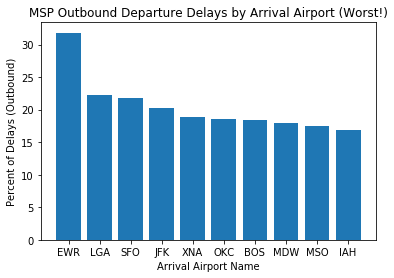

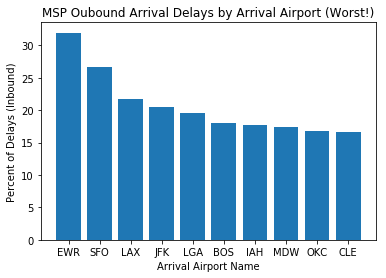

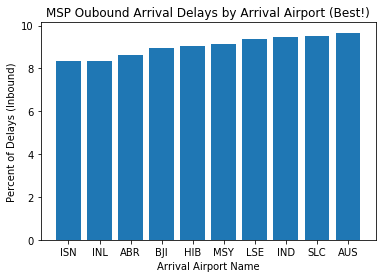

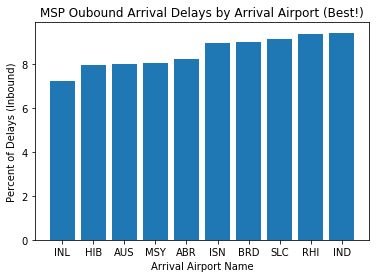

In [26]:
plt.bar(route_outbound_delays_df_top_ten_dep.index, route_outbound_delays_df_top_ten_dep["Percent of Delayed Departures"])
plt.ylabel("Percent of Delays (Outbound)")
plt.xlabel("Arrival Airport Name")
plt.title("MSP Outbound Departure Delays by Arrival Airport (Worst!)")
plt.show()
plt.bar(route_outbound_delays_df_top_ten_arr.index, route_outbound_delays_df_top_ten_arr["Percent of Delayed Arrivals"])
plt.ylabel("Percent of Delays (Inbound)")
plt.xlabel("Arrival Airport Name")
plt.title("MSP Oubound Arrival Delays by Arrival Airport (Worst!)")
plt.show()
plt.bar(route_outbound_delays_df_bot_ten_dep.index, route_outbound_delays_df_bot_ten_dep["Percent of Delayed Departures"])
plt.ylabel("Percent of Delays (Inbound)")
plt.xlabel("Arrival Airport Name")
plt.title("MSP Oubound Arrival Delays by Arrival Airport (Best!)")
plt.show()
plt.bar(route_outbound_delays_df_bot_ten_arr.index, route_outbound_delays_df_bot_ten_arr["Percent of Delayed Arrivals"])
plt.ylabel("Percent of Delays (Inbound)")
plt.xlabel("Arrival Airport Name")
plt.title("MSP Oubound Arrival Delays by Arrival Airport (Best!)")
plt.show()

In [20]:
msp_inbound_df = route_df.loc[route_df["DEST"] == "MSP", :]
f = {"DEP_DEL15":["count","sum"],"ARR_DEL15":["count","sum"]}
msp_inbound_delays_df=msp_inbound_df.groupby("ORIGIN").agg(f)
msp_inbound_delays_df.columns=["dep_count","dep_sum","arr_count","arr_sum"]
msp_inbound_delays_df = msp_inbound_delays_df.loc[msp_inbound_delays_df["dep_count"] >= 365, :]
msp_inbound_delays_df["Percent of Delayed Departures"] = (msp_inbound_delays_df["dep_sum"]/msp_inbound_delays_df["dep_count"])*100
msp_inbound_delays_df["Percent of Delayed Arrivals"] = (msp_inbound_delays_df["arr_sum"]/msp_inbound_delays_df["arr_count"])*100
msp_inbound_delays_df_top_ten_dep = msp_inbound_delays_df.sort_values(by="Percent of Delayed Departures", ascending=False).head(10)
msp_inbound_delays_df_top_ten_arr = msp_inbound_delays_df.sort_values(by="Percent of Delayed Arrivals", ascending=False).head(10)
msp_inbound_delays_df_bot_ten_dep = msp_inbound_delays_df.sort_values(by="Percent of Delayed Departures", ascending=True).head(10)
msp_inbound_delays_df_bot_ten_arr = msp_inbound_delays_df.sort_values(by="Percent of Delayed Arrivals", ascending=True).head(10)

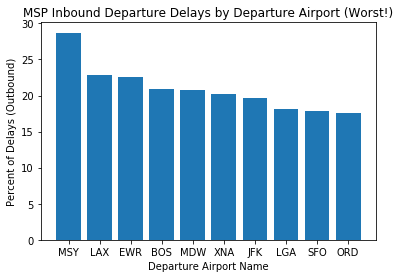

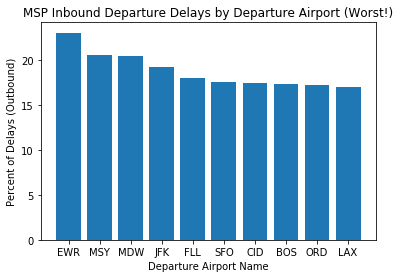

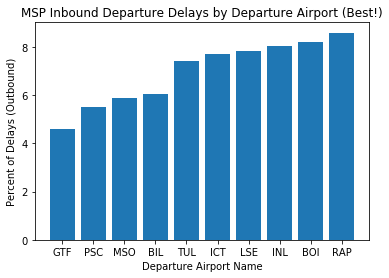

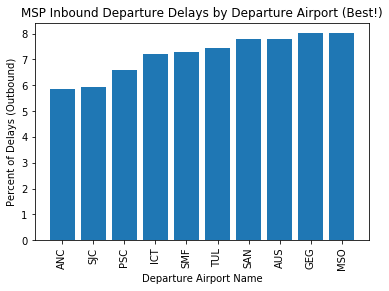

In [21]:
plt.bar(msp_inbound_delays_df_top_ten_dep.index, msp_inbound_delays_df_top_ten_dep["Percent of Delayed Departures"])
plt.ylabel("Percent of Delays (Outbound)")
plt.xlabel("Departure Airport Name")
plt.title("MSP Inbound Departure Delays by Departure Airport (Worst!)")
plt.show()
plt.bar(msp_inbound_delays_df_top_ten_arr.index, msp_inbound_delays_df_top_ten_arr["Percent of Delayed Arrivals"])
plt.ylabel("Percent of Delays (Outbound)")
plt.xlabel("Departure Airport Name")
plt.title("MSP Inbound Departure Delays by Departure Airport (Worst!)")
plt.show()
plt.bar(msp_inbound_delays_df_bot_ten_dep.index, msp_inbound_delays_df_bot_ten_dep["Percent of Delayed Departures"])
plt.ylabel("Percent of Delays (Outbound)")
plt.xlabel("Departure Airport Name")
plt.title("MSP Inbound Departure Delays by Departure Airport (Best!)")
plt.show()
plt.bar(msp_inbound_delays_df_bot_ten_arr.index, msp_inbound_delays_df_bot_ten_arr["Percent of Delayed Arrivals"])
plt.ylabel("Percent of Delays (Outbound)")
plt.xlabel("Departure Airport Name")
plt.title("MSP Inbound Departure Delays by Departure Airport (Best!)")
plt.show()

In [6]:
new_route_df = df[["OP_UNIQUE_CARRIER","ORIGIN_AIRPORT","DEST_AIRPORT","DEP_DELAY","DEP_DEL15","ARR_DELAY","ARR_DEL15", "CRS_ARR_TIME", "ARR_TIME"]]
new_route_df.head()
sched_vs_act_arrival_df = new_route_df.loc[new_route_df["ORIGIN_AIRPORT"] == "Minneapolis-Saint Paul International Airport", :]
sched_vs_act_arrival_df = sched_vs_act_arrival_df.loc[sched_vs_act_arrival_df["DEP_DEL15"] == 1, :]
sched_vs_act_arrival_df.head()

,OP_UNIQUE_CARRIER,ORIGIN_AIRPORT,DEST_AIRPORT,DEP_DELAY,DEP_DEL15,ARR_DELAY,ARR_DEL15,CRS_ARR_TIME,ARR_TIME
6,UA,Minneapolis-Saint Paul International Airport,San Francisco International Airport,94.0,1.0,85.0,1.0,1753,1918.0
32,UA,Minneapolis-Saint Paul International Airport,San Francisco International Airport,161.0,1.0,161.0,1.0,1936,2217.0
65,UA,Minneapolis-Saint Paul International Airport,Denver International Airport,19.0,1.0,5.0,0.0,1015,1020.0
67,UA,Minneapolis-Saint Paul International Airport,Chicago O'Hare International Airport,16.0,1.0,-7.0,0.0,1504,1457.0
127,UA,Minneapolis-Saint Paul International Airport,Denver International Airport,16.0,1.0,1.0,0.0,1310,1311.0


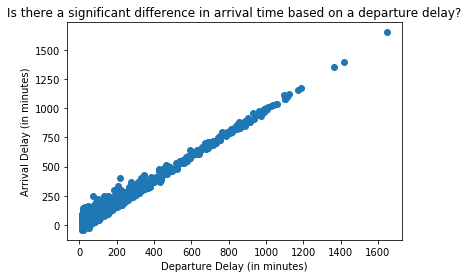

In [7]:
plt.scatter(sched_vs_act_arrival_df["DEP_DELAY"], sched_vs_act_arrival_df["ARR_DELAY"])
plt.ylabel("Arrival Delay (in minutes)")
plt.xlabel("Departure Delay (in minutes)")
plt.title("Is there a significant difference in arrival time based on a departure delay?")
plt.show()